In [283]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline
import pandas as pd
from IPython.display import Markdown, display
import numpy as np
'''
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details'''

'\nimport pandas as pd\nimport statsmodels.api as sm\nfrom statsmodels.nonparametric.kde import KDEUnivariate\nfrom statsmodels.nonparametric import smoothers_lowess\nfrom pandas import Series, DataFrame\nfrom patsy import dmatrices\nfrom sklearn import datasets, svm\nfrom KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details'

In [284]:
def printmd(string):
    display(Markdown(string))
    
def plot_train(df):
    # specifies the parameters of our graphs
    fig = plt.figure(figsize=(18,6), dpi=1600) 
    alpha=alpha_scatterplot = 0.2 
    alpha_bar_chart = 0.55

    # lets us plot many diffrent shaped graphs together 
    ax1 = plt.subplot2grid((2,3),(0,0))
    # plots a bar graph of those who surived vs those who did not.               
    df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
    # this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
    ax1.set_xlim(-1, 2)
    # puts a title on our graph
    plt.title("Distribution of Survival, (1 = Survived)")    

    plt.subplot2grid((2,3),(0,1))
    plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
    # sets the y axis lable
    plt.ylabel("Age")
    # formats the grid line style of our graphs                          
    plt.grid(b=True, which='major', axis='y')  
    plt.title("Survival by Age,  (1 = Survived)")

    ax3 = plt.subplot2grid((2,3),(0,2))
    df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
    ax3.set_ylim(-1, len(df.Pclass.value_counts()))
    plt.title("Class Distribution")

    plt.subplot2grid((2,3),(1,0), colspan=2)
    # plots a kernel density estimate of the subset of the 1st class passangers's age
    df.Age[df.Pclass == 1].plot(kind='kde')    
    df.Age[df.Pclass == 2].plot(kind='kde')
    df.Age[df.Pclass == 3].plot(kind='kde')
     # plots an axis lable
    plt.xlabel("Age")    
    plt.title("Age Distribution within classes")
    # sets our legend for our graph.
    plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

    ax5 = plt.subplot2grid((2,3),(1,2))
    df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
    ax5.set_xlim(-1, len(df.Embarked.value_counts()))
    # specifies the parameters of our graphs
    plt.title("Passengers per boarding location")

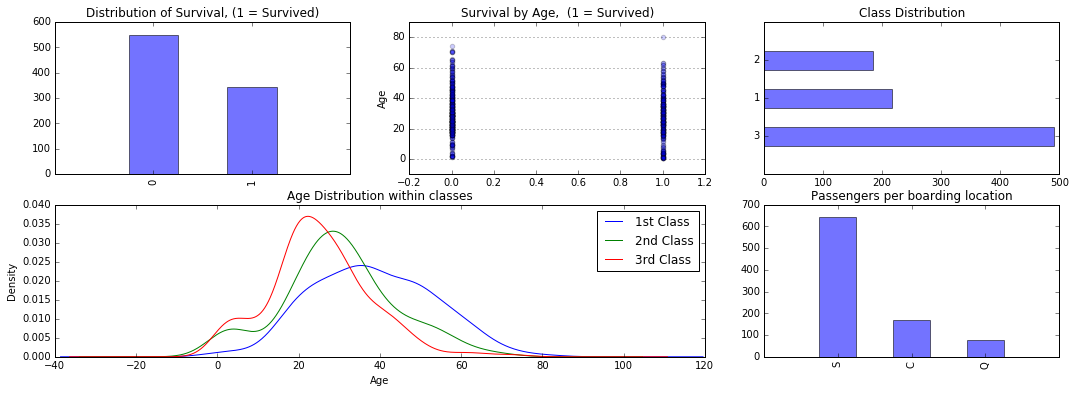

In [285]:
df = pd.read_csv('../kaggle-titanic/data/train.csv')
plot_it(df)

In [325]:
class train(object):
    def __init__(self):
        self.data = None
        self.features = defaultdict(set)
        self.fig = defaultdict(tuple) # each figure will have a "name" key and a tuple of figure, axes objects
        pass
    
    def load_df(self, df):
        self.data = df
        self.features['all'] = set(self.data.columns)
    
    def define_target(self, column):
        self.features['target'] = column
        
    def define_metadata(self, columns):
        if isinstance(columns, str):
            columns = [columns]
        self.features['metadata'] = sorted(list(set(columns)))
        
    def define_binary_features(self, columns):
        if isinstance(columns, str):
            columns = [columns]
        self.features['binary'] = sorted(list(set(columns)))
        
    def define_categorical_features(self, columns):
        if isinstance(columns, str):
            columns = [columns]
        self.features['categorical'] = sorted(list(set(columns)))
        
    def define_continuous_features(self, columns):
        if isinstance(columns, str):
            columns = [columns]
        self.features['continuous'] = sorted(list(set(columns)))
        
    def define_discrete_features(self, columns):
        if isinstance(columns, str):
            columns = [columns]
        self.features['discrete'] = sorted(list(set(columns)))
    
    def print_feature_types(self):
        data_types = iter(self.features.keys())
        for data_type in data_types:
            if data_type == 'all':
                next(data_types)
            else: 
                printmd('**%s**' % data_type) 
                print '\t' + '\n\t'.join(self.features[data_type]) 
    
    def set_figure(self, name, grid = None):
        self.fig[name]['fig'] = plt.figure(figsize=(18,6), dpi=1600)
        if grid_pos: 
            self.fig[name]['grid'] = grid
            
    def plot_hist(self, feature, by = None, name=None):
        fig, ax = plt.subplots(figsize=(18,6), dpi=1600)
            
        if by in (self.features['binary'] or self.features['categorical']):
            classes = sorted(set(self.data[by]))
            for value in classes:
                try:
                    figure = self.data[self.data[by]==value][feature].plot(kind='kde')
                except ValueError:
                    pass
            plt.legend(classes, loc='best', title = by)

        elif by == None:
            figure = self.data[feature].plot(kind='kde')
       
        else: return "need to plot by a binary or categorical feature type"
            
        plt.xlabel(feature)
        if name == None:
            if by == None:
                name = feature
            else: 
                name = feature + ' by ' + by
        plt.title(name)
    
    def plot_bar(self, feature, by = None, name=None):
        
        self.data.groupby(by=feature)[by].value_counts().unstack().plot(kind='bar', figsize = (18,6))
        
        classes = sorted(set(self.data[by]))
        plt.xlabel(feature)
        plt.legend(classes, loc='best', title = by)
        plt.title(name)
        
    def plot_scatter_matrix(self):
        pd.tools.plotting.scatter_matrix(self.data, alpha=0.2, figsize=(18, 18), diagonal='kde')
    
    def plot_hexbin(self, features):
        
        ax = self.data.plot.hexbin(x=features[0], y=features[1], C = self.features['target'], gridsize=25, 
                                   figsize = (10,8), sharex = False)
        target_range = self.data[self.features['target']].min(), self.data[self.features['target']].max()
        feature_range = {features[0]: (self.data[features[0]].min(), self.data[features[0]].max()), \
                         features[1]: (self.data[features[1]].min(), self.data[features[1]].max())}
        plt.ylim([feature_range[features[1]][0]- 0.2, feature_range[features[1]][1]+0.2])
        ax.set_xlim([feature_range[features[0]][0] - 1, feature_range[features[0]][1]+1])
        ax.set_xlabel(features[0])
        
        
training = train()

training.load_df(df)
training.define_target('Survived')
training.define_metadata(['Name', 'Ticket'])
training.define_categorical_features(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Cabin', 'Embarked'])
training.define_binary_features('Parch')
training.define_discrete_features('Age')
training.define_continuous_features('Fare')
training.print_feature_types()

**binary**

	Parch


**categorical**

	Cabin
	Embarked
	PassengerId
	Pclass
	Sex
	SibSp


**continuous**

	Fare


**discrete**

	Age


**metadata**

	Name
	Ticket


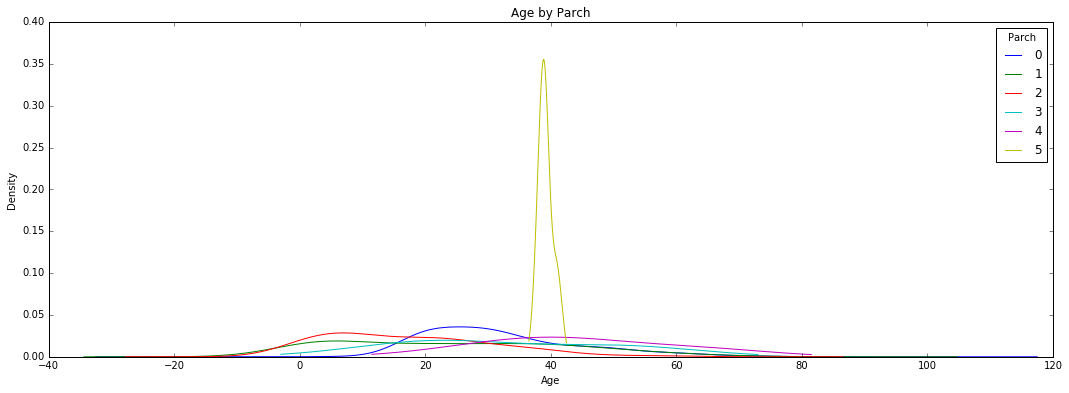

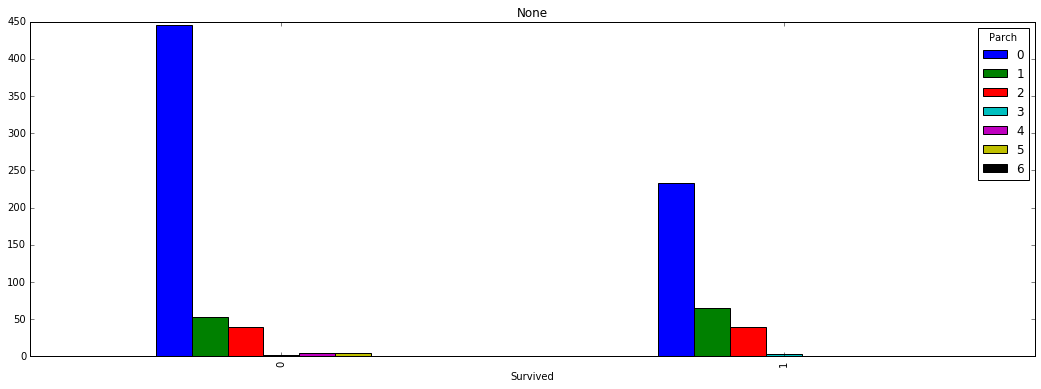

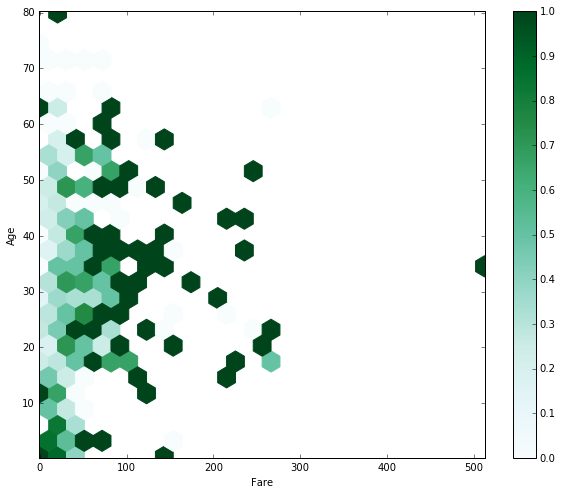

In [326]:
training.plot_hist('Age',  by='Parch')
training.plot_bar('Survived', by = 'Parch')
training.plot_hexbin(['Fare', 'Age'])

In [ ]:
df[(df['Parch']==0)&(df['Survived']==0)].describe()